1. Can we use Bagging for regression problems?

Yes. Bagging (Bootstrap Aggregation) can be used both for classification and regression. The idea is the same: you generate multiple bootstrap samples of the training data (sampling with replacement), train a base estimator on each sample, and aggregate their predictions.

For regression: you typically average the predictions of all base learner regressors.

For classification: you do majority voting (or sometimes probabilities).

Using bagging for regression helps reduce variance of high‐variance models (like decision trees), thus avoiding overfitting.
2. What is the difference between multiple model training and single model training?

“Multiple model training” here refers to ensemble methods: training several models (base learners, often similar type) and combining their predictions vs “single model training” which uses just one model. Key differences:

Aspect	Single Model	Multiple (Ensemble) Models
Variance	Higher variance (especially for unstable learners)	Lower variance by averaging or voting
Risk of overfitting	Higher (if model is very flexible)	Lower (due to averaging)
Bias	Depends on model’s capacity	Can increase a bit of bias (because models may be constrained/randomized), but often the trade‑off is favorable
Robustness	Sensitive to quirks in data	More robust to noisy observations or outliers
Complexity & Computation	Simpler, faster (one model)	More expensive: training many models, storage, prediction time etc.
Interpretability	Easier to interpret (single model)	Harder to interpret (aggregate of many models)
3. Explain the concept of feature randomness in Random Forest

Feature randomness (a.k.a “feature bagging”, “random feature subset”) is an additional source of randomness introduced in Random Forests beyond bootstrap sampling of instances. The idea:

At each split in a decision tree in the forest, instead of considering all the features to decide the best split, you randomly select a subset of features and search for the best split among those.

This reduces correlation among the trees, because if there are one or few very strong predictors, in a standard decision tree they tend to be used early in many trees, making trees similar. By restricting feature choice, different trees may use different features, increasing diversity.

This helps reduce variance (trees being less correlated) and improves generalization.
frankmbrown.net
+3
HackMD
+3
Medium
+3

4. What is Out‑of‑Bag (OOB) Score?

Out‑of‑Bag (OOB) score (or OOB error / out‑of‑bag estimation) arises naturally from bootstrap sampling. The idea:

When you draw a bootstrap sample (with replacement) of size n from n training examples, some examples will be left out (roughly ~1/3 on average).

For each base estimator (tree), those left‑out examples (for that tree) are its OOB samples.

After training, you can use those OOB samples to test that tree: predict using that tree on only its OOB examples.

For the whole ensemble, you aggregate predictions for each training example only from trees where that example was OOB, then compare to its true label or value.

This gives an estimate of generalization error (or score) without needing a separate validation set. It’s efficient because you use the training data itself in a clever way.
xiaoxl
+2
Wikipedia
+2

5. How can you measure the importance of features in a Random Forest model?

There are a couple of main standard ways:

Mean decrease in impurity (MDI)

During tree building, each time a feature is used to split a node, there is some reduction in impurity (e.g. Gini impurity for classification, variance for regression).

The feature’s importance is the (weighted) sum of all those impurity decreases over all trees, weighted by number of samples that reach those nodes.

After aggregating over the forest, you can normalize so that importances sum up to 1.
frankmbrown.net
+1

Permutation importance (or “mean decrease accuracy / error”)

After the forest is trained, for each feature, randomly permute its values in the dataset (or OOB samples) and see how much model performance degrades.

If permuting a feature causes a big drop in performance, it's important. If little change, it's less important.

This measures importance more reliably in many cases, especially when features are correlated. (Variants exist.)
Wikipedia
+2
Luis Vale Silva
+2

There are also more advanced / debiased measures to correct biases (especially in the impurity‐based ones) when features differ in scale or type.
arXiv

6. Explain the working principle of a Bagging Classifier

Here’s how a Bagging Classifier works step by step:

Bootstrap sampling: From the original training data of size n, generate k bootstrap samples (each of size n, sampled with replacement). Each bootstrap sample may omit some original examples and duplicate others.

Train base classifiers: Train a base classifier (e.g. a decision tree) independently on each bootstrap sample. All classifiers are trained in parallel and independently.

Aggregation:

For classification: for a new sample, each classifier makes a prediction (class label), then a majority vote (or weighted vote / average of probabilities) is taken as the final prediction.

For regression: predictions of base regressors are averaged.

(Optional) OOB evaluation: Use the out‑of‑bag data (for each base classifier) to estimate performance without needing a held‑out validation set.

The overall goal: reduce variance (overfitting) by averaging many estimators.

7. How do you evaluate a Bagging Classifier’s performance?

You can evaluate using:

Held‑out test set: Traditional train/test split, then compute metrics (accuracy, precision/recall/F1/AUC etc.).

Cross‐validation: e.g. k‑fold CV.

Out‑of‑Bag score: As described, OOB gives you an internal estimate of performance using training data. Good when cross‑validation or separate validation set is expensive.
xiaoxl
+1

Also look at other diagnostics:

Confusion matrix for classification.

ROC / AUC if relevant.

Overfitting signs: big difference between training accuracy and test / OOB accuracy.

8. How does a Bagging Regressor work?

Same general mechanism as Bagging Classifier, but for regression:

Generate bootstrap samples.

Train base regressors (often decision tree regressors) on each sample.

For new samples, aggregate predictions by averaging (instead of voting).

OOB estimation also works: for each training example, collect predictions from regressors for which the example was OOB, compute the average, compare to true value.

It helps smooth out the prediction errors and reduce variance, at possible cost of a small bias.

9. What is the main advantage of ensemble techniques?

Some of the main advantages:

Reduced variance / overfitting: By averaging or voting, you reduce the effect of noise in training data.

Better predictive performance: Ensembles often outperform single models.

Robustness: More stable to changes in data, less sensitive to particular features or noise.

Flexibility: Can combine different kinds of models (in some ensemble methods) to capture different aspects.

10. What is the main challenge of ensemble methods?

Challenges include:

Computational cost: Training many base learners takes more time, memory, and resources. Predictions can also be slower.

Interpretability: Hard to understand what exactly the model is doing when many models are aggregated.

Risk of overfitting if not used carefully: Though ensembles reduce variance, poorly configured ones (too many trees, too high complexity, not enough randomness) can still overfit.

Complexity in tuning: Random forest / boosting have many hyperparameters; understanding and tuning them is harder.

Diminishing returns: After certain point, adding more models adds little benefit (especially in bagging / random forests).

11. Explain the key idea behind ensemble techniques

The key idea: combine multiple learners to produce a composite model with better generalization than any individual learner. The multiple learners should be diverse (make different errors) so that when you aggregate, the errors cancel out or average out. There are two main ways to get diversity:

Vary the data (e.g. bootstrap sampling as in bagging)

Vary the model or its inputs (feature randomness, different base estimators, different parameter settings)

Aggregation can be done by voting (classification), averaging (regression), or more complex methods.

12. What is a Random Forest Classifier?

A Random Forest Classifier is an ensemble of decision trees used for classification tasks. It works roughly as:

Build many decision trees on bootstrapped datasets (sampling with replacement).

For each split in a tree, only a random subset of features is considered (feature randomness) rather than all features.

Each tree outputs a class prediction; the forest’s prediction is by majority vote among all trees.

It often uses out‑of‑bag scoring.

Random forests tend to reduce overfitting vs single trees and give good performance in many applications.
Luis Vale Silva
+2
Wikipedia
+2

13. What are the main types of ensemble techniques?

Main types include:

Bagging (Bootstrap Aggregation): Independent base learners trained on bootstrapped samples; aggregate by voting or averaging.

Random Forest: Special case of bagging + feature randomness (feature sampling at splits).

Boosting: Sequentially train base learners; each one tries to correct errors of previous ones. Examples include AdaBoost, Gradient Boosting, XGBoost, etc.

Stacking (Stacked Generalization): Train multiple different base learners, then train a meta‑learner on their outputs.

Voting / Averaging Ensembles: Simple ensembles that take predictions from multiple models and take majority vote (classification) or average (regression); sometimes weighted.

Hybrid ensembles: Combining different methods (e.g. boosting + bagging), or ensembles of different model types.

14. What is ensemble learning in machine learning?

Ensemble learning refers to methods that build multiple models (learners) and combine them to improve overall performance (accuracy, robustness) over individual models. The basic assumption is that different models will make different kinds of errors, so combining them reduces overall error (especially variance) and often yields better generalization.

15. When should we avoid using ensemble methods?

Situations where ensemble might not be ideal:

When interpretability is crucial: e.g. medical diagnosis, regulatory settings, when you need simple explanations. Single models or simpler models might be preferred.

Computational constraints: If training resources (time, memory, CPU) are limited.

Small datasets: If data is too little, ensembles might overfit or maybe simpler models suffice; also bootstrapping may not give much diversity.

When base model is already very stable / low variance: If the base model generalizes well, ensemble gains may be small.

When simplicity / deployment constraints matter: Easier to deploy smaller, simpler models.

16. How does Bagging help in reducing overfitting?

Bagging reduces overfitting mainly by reducing variance:

Each base learner might overfit its particular bootstrap sample; but since many learners are trained on different samples, their overfitting is in somewhat different ways.

When we aggregate (vote or average), the overfitted fluctuations (noise) tend to cancel out, leaving a more stable prediction.

Also, bootstrap sampling ensures that each model sees different variations of data; thus reduces the chance that the model overfits to specific idiosyncrasies of the full dataset.

17. Why is Random Forest better than a single Decision Tree?


Compared to a single decision tree, a random forest offers:

Lower variance: Because predictions are averaged across many trees. A single tree is very sensitive to small changes in data; a forest is more stable.

Handles overfitting better: Trees tend to overfit; forests reduce that.

Often better predictive performance: Random forests tend to perform well out of the box.

Feature importance measures built in.

More robust to noise, outliers, and irrelevant features.

Downsides include more computational cost, less interpretability.

18. What is the role of bootstrap sampling in Bagging?


Bootstrap sampling (sampling with replacement) is what enables the sampling variability needed in bagging. Role:

It creates multiple different training sets (some observations duplicated, some left out) so that each base estimator sees a different view of the data.

The out-of-bag samples (those left out) serve as a kind of internal validation for each tree.

Bootstrap sampling introduces diversity among base models, which is crucial to make aggregation meaningful (if all models were identical, no benefit).

19. What are some real‑world applications of ensemble techniques?


Some real‑world examples:

Random forests used in credit scoring, fraud detection, risk assessment.

Boosting (Gradient Boosting, XGBoost, LightGBM) in many Kaggle competitions and in production (e.g. click‑through rate prediction, search ranking, recommendation systems).

Ensemble methods in image processing / medical imaging, e.g. combining multiple classifiers for diagnosis.

In finance: predicting stock prices or defaults using ensemble regression models.

In text classification / NLP: ensembles of different classifiers.

20. What is the difference between Bagging and Boosting?

Key differences:

Aspect	Bagging	Boosting
How models are built	Independently in parallel, each trained on a bootstrap sample of data	Sequentially; each new model tries to correct errors of previous models
Emphasis	Reducing variance; aim to make many "strong-ish" learners and average them	Reducing bias and variance; focus on difficult instances
Error handling	All base models have equal weight in aggregation (unless weighted)	Later models are focused more on previously misclassified / high‐error instances; more weight to harder cases
Risk of overfitting	Less overfitting compared to single model; safer but may not capture very complex patterns if trees weak	Can overfit if boosting is too aggressive; must regularize (e.g. via learning rate, limiting depth, etc.)
Complexity / tuning	Simpler to tune (number of estimators, bootstrap sample size, etc.)	More hyperparameters (learning rate, number of rounds, tree depth, etc.), more careful tuning needed

In [7]:
# Common imports
import numpy as np
from sklearn.datasets import load_breast_cancer, make_classification, make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Bagging (DT) Classifier Accuracy:", acc)

# 22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)
Xr, yr = make_regression(n_samples=1000, n_features=20, noise=0.5, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.3, random_state=42)

bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bag_reg.fit(Xr_train, yr_train)
yr_pred = bag_reg.predict(Xr_test)
mse = mean_squared_error(yr_test, yr_pred)
print("Bagging (DT) Regressor MSE:", mse)

# 23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores
data = load_breast_cancer()
X_bc, y_bc = data.data, data.target
Xbc_train, Xbc_test, ybc_train, ybc_test = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(Xbc_train, ybc_train)
ybc_pred = rf_clf.predict(Xbc_test)
acc_bc = accuracy_score(ybc_test, ybc_pred)
print("Random Forest (Breast Cancer) Accuracy:", acc_bc)

importances = rf_clf.feature_importances_
for name, importance in zip(data.feature_names, importances):
    print(f"{name}: {importance:.4f}")

# 24. Train a Random Forest Regressor and compare its performance with a single Decision Tree
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(Xr_train, yr_train)
yrf_pred = rfr.predict(Xr_test)
mse_rfr = mean_squared_error(yr_test, yrf_pred)
print("Random Forest Regressor MSE:", mse_rfr)

# Single decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(Xr_train, yr_train)
yr_tree_pred = tree_reg.predict(yr_test) # This line was changed to use yr_test instead of Xr_test
mse_tree = mean_squared_error(yr_test, yr_tree_pred)
print("Single Decision Tree Regressor MSE:", mse_tree)

# 25. Compute the Out‑of‑Bag (OOB) Score for a Random Forest Classifier
rf_clf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_clf_oob.fit(Xbc_train, ybc_train)
print("OOB Score (Random Forest):", rf_clf_oob.oob_score_)

# 26. Train a Bagging Classifier using SVM as a base estimator and print accuracy
from sklearn.svm import SVC

bag_svc = BaggingClassifier(estimator=SVC(kernel='rbf', probability=True),
                            n_estimators=20, random_state=42)
bag_svc.fit(X_train, y_train)
y_svc_pred = bag_svc.predict(X_test)
acc_svc_bag = accuracy_score(y_test, y_svc_pred)
print("Bagging (SVM) Classifier Accuracy:", acc_svc_bag)

# 27. Train a Random Forest Classifier with different numbers of trees and compare accuracy
for n_trees in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf.fit(Xbc_train, ybc_train)
    ypred = rf.predict(Xbc_test)
    acc = accuracy_score(ybc_test, ypred)
    print(f"RF with {n_trees} trees: Accuracy = {acc:.4f}")

# 28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
from sklearn.linear_model import LogisticRegression

pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear', random_state=42))
bag_lr = BaggingClassifier(estimator=pipeline, n_estimators=50, random_state=42)
bag_lr.fit(X_train, y_train)
y_prob = bag_lr.predict_proba(X_test)[:,1]
auc_lr = roc_auc_score(y_test, y_prob)
print("Bagging (Logistic Regression) AUC:", auc_lr)

# 29. Train a Random Forest Regressor and analyze feature importance scores
rfr2 = RandomForestRegressor(n_estimators=100, random_state=42)
rfr2.fit(Xr_train, yr_train)
yrf2_pred = rfr2.predict(Xr_test)
mse_rfr2 = mean_squared_error(yr_test, yrf2_pred)
print("Random Forest Regressor MSE:", mse_rfr2)
# feature importances
importances_r = rfr2.feature_importances_
for idx, imp in enumerate(importances_r):
    print(f"Feature {idx}: {imp:.4f}")

# 30. Train an ensemble model using both Bagging and Random Forest and compare accuracy
# Here we can ensemble (voting) between a BaggingClassifier and a Random Forest Classifier

from sklearn.ensemble import VotingClassifier

clf1 = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('bag', clf1), ('rf', clf2)],
    voting='soft'   # use 'soft' for probabilistic combining
)
voting_clf.fit(Xbc_train, ybc_train)
yvoting_pred = voting_clf.predict(Xbc_test)
acc_voting = accuracy_score(ybc_test, yvoting_pred)
print("Voting Ensemble (Bagging + Random Forest) Accuracy:", acc_voting)

Bagging (DT) Classifier Accuracy: 0.87
Bagging (DT) Regressor MSE: 7772.849926030816
Random Forest (Breast Cancer) Accuracy: 0.9707602339181286
mean radius: 0.0323
mean texture: 0.0111
mean perimeter: 0.0601
mean area: 0.0538
mean smoothness: 0.0062
mean compactness: 0.0092
mean concavity: 0.0806
mean concave points: 0.1419
mean symmetry: 0.0033
mean fractal dimension: 0.0031
radius error: 0.0164
texture error: 0.0032
perimeter error: 0.0118
area error: 0.0295
smoothness error: 0.0059
compactness error: 0.0046
concavity error: 0.0058
concave points error: 0.0034
symmetry error: 0.0040
fractal dimension error: 0.0071
worst radius: 0.0780
worst texture: 0.0188
worst perimeter: 0.0743
worst area: 0.1182
worst smoothness: 0.0118
worst compactness: 0.0175
worst concavity: 0.0411
worst concave points: 0.1271
worst symmetry: 0.0129
worst fractal dimension: 0.0069
Random Forest Regressor MSE: 7338.274108274337


ValueError: Expected 2D array, got 1D array instead:
array=[-3.22918762e+02 -3.76930359e+02  3.69509338e+02 -2.73552338e+02
  1.96535889e+02  2.09125183e+02  4.14865784e+02 -1.31073746e+02
 -6.66223373e+01 -2.84502838e+02 -1.88580353e+02 -3.89813416e+02
 -6.08562050e+01 -4.37703362e+01  6.45759354e+01  6.71641693e+01
 -1.81967865e+02 -1.93371765e+02 -3.94750519e+01  5.00256226e+02
 -1.46911026e+02  1.23030128e+02  2.22133606e+02  4.92123032e+01
  2.43231659e+02  3.96723008e+00  1.76413574e+01  4.53891541e+02
  5.00354881e+01  3.48390770e+01 -2.47812614e+01  8.24681320e+01
  6.87373810e+01 -1.05772858e+02  9.43679333e+00 -1.75145157e+02
 -8.00213089e+01  3.18102692e+02  4.19858665e+01  1.72465775e+02
 -2.05000244e+02  1.04939758e+02 -1.18993330e+01 -2.82846893e+02
 -4.25607033e+01  1.47629166e-02 -3.03750793e+02  1.80702072e+02
 -7.73515606e+00 -1.47506912e+02 -1.70720196e+01  1.25434639e+02
 -8.33825302e+01 -5.81690796e+02  1.56036102e+02  3.47048157e+02
  1.22835701e+02  5.33626127e+00 -2.42267838e+01 -4.36517601e+01
  2.37754089e+02  2.82197800e+01  2.24893784e+02 -1.65015869e+02
 -1.02220390e+02  2.44386997e+01 -1.45483017e+02 -4.49272461e+02
 -2.58016186e+01  2.29748058e+01 -1.97870979e+01  1.26076973e+02
  1.82298843e+02 -1.70020050e+02  1.73471344e+02 -8.14808121e+01
 -3.35462982e+02  1.74439392e+02 -1.99338245e+01 -6.87223129e+01
 -3.01138397e+02  7.38830719e+01 -3.13783844e+02  4.71147430e+02
 -1.42844238e+02  1.28522522e+02 -1.40050674e+02 -7.91642838e+01
 -2.90324890e+02  5.95839806e+01  2.68835266e+02  6.43636398e+01
  1.85921432e+02 -2.78540649e+02  2.19745026e+02 -7.88485432e+00
  1.72982666e+02  6.04223747e+01 -1.05598663e+02 -1.22754135e+02
  2.70619850e+01 -2.55407471e+02 -6.50492859e+01  4.24112793e+02
 -1.47141342e+02  2.36340515e+02  3.12584778e+02 -4.84235001e+01
 -1.20877144e+02  1.10290916e+02  1.90834026e+01  1.51000244e+02
 -9.93015213e+01  5.03555756e+01  1.46789789e+01 -3.15580688e+02
 -2.14865311e+02 -3.70426674e+01 -1.09206009e+02  3.76023483e+00
  1.77175507e+02  2.64847839e+02 -2.49488510e+02  1.70331230e+01
  2.97508606e+02  1.19371964e+02  1.10089203e+02  8.93537521e+01
  1.14614159e+02  2.57828388e+01  2.05426193e+02 -8.03800201e+01
 -2.26893854e+00 -8.00056076e+01 -7.43003464e+01  4.18835876e+02
 -2.09316010e+02 -5.49038925e+01  5.08630028e+01  2.10005371e+02
  6.76386719e+01 -1.18225891e+02  1.10519997e+02 -1.83165817e+02
  1.71825699e+02 -3.45779175e+02  2.42483047e+02  2.64255035e+02
  1.08521660e+02  8.07596207e+01 -8.29452057e+01  1.21685326e+02
 -3.24637024e+02  1.57084763e+02 -6.53388443e+01  8.64466095e+01
  2.35764206e+02  3.07332977e+02 -1.70768997e+02 -1.90880356e+01
  2.57534146e+00 -2.43215057e+02  2.81160675e+02  1.52193634e+02
  3.70692932e+02  1.17494186e+02 -1.23864967e+02  1.23396378e+02
  3.75063660e+02 -4.30771332e+01  1.13203888e+01 -3.73066620e+02
 -7.50952530e+01 -1.50014801e+02  2.72632935e+02 -1.11685387e+02
 -1.96077530e+02 -1.30412933e+02  1.68427597e+02  1.34971209e+01
  1.09630951e+02 -2.07757874e+02 -8.11747131e+01 -5.26008911e+01
  1.36696060e+02 -1.80282745e+02 -2.34940079e+02 -2.05396698e+02
 -1.14696190e+02  3.01837128e+02 -3.81982574e+02 -1.71741699e+02
 -3.08155823e+01  3.43857697e+02  4.50945425e+00 -1.38961380e+02
  2.08641495e+02 -1.44449356e+02  1.99502899e+02  1.25538773e+02
 -1.87741974e+02 -8.30410385e+00 -2.33690323e+02 -1.57945929e+01
  1.44633316e+02  6.44707184e+01 -2.37868103e+02  7.64597321e+01
  1.83173767e+02 -9.29289474e+01  7.44494553e+01 -1.81391861e+02
  1.43571121e+02 -3.37144394e+01  2.00171387e+02  8.91270676e+01
  1.64268906e+02 -1.96623703e+02  8.12174911e+01  2.92532715e+02
 -3.69303474e+01  3.43458099e+01 -2.98444633e+01 -1.75725266e+02
 -5.31758545e+02  1.88730789e+02 -9.54030533e+01  1.16491394e+02
 -2.70278168e+01  1.79069778e+02 -2.72428513e+01  1.87051105e+01
 -1.16307846e+02  3.48213135e+02 -2.10100571e+02 -1.75313934e+02
 -8.04358521e+01 -7.84335089e+00 -8.36431122e+01 -5.35809669e+01
 -1.79443863e+02  6.83063889e+01 -1.17590523e+02  2.54044540e+02
  1.47536102e+02  1.35153107e+02  1.17005844e+02 -3.75978546e+01
  3.08485687e+02  5.13742676e+01  3.47029114e+01 -1.08065292e+02
 -2.55286987e+02  1.35384537e+02 -4.62952667e+02 -3.53862953e+01
 -1.88634415e+02  3.35525398e+01 -1.88784885e+01  2.39697525e+02
 -1.93023544e+02 -5.34229965e+01  2.93023834e+02 -1.44574661e+02
 -1.04313553e+02 -1.57900467e+02  2.46496368e+02  1.89254852e+02
 -1.98936295e+02 -8.34662170e+01 -3.72898499e+02 -8.26107330e+01
 -1.41618118e+02 -4.13379639e+02  1.48462572e+01 -1.54961319e+02
 -7.34962540e+01  2.18627426e+02  4.29776276e+02 -5.41596031e+01
  9.67932129e+01  1.83580475e+02 -3.70134888e+01  2.43836594e+02
 -3.66926178e+02 -1.27854744e+02 -4.69249939e+02  2.99286407e+02
 -1.62622086e+02  6.24778099e+01  1.05908768e+02 -3.39740875e+02
  3.71190826e+02 -1.34376648e+02  2.59841881e+01  6.28429794e+01
 -1.12644440e+02  7.07733231e+01  5.00248833e+01 -2.68223969e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best params (RF): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy of best RF: 0.9707602339181286
Bagging Regressor with 10 trees: MSE = 9304.9187
Bagging Regressor with 50 trees: MSE = 7922.5570
Bagging Regressor with 100 trees: MSE = 7434.5932
Bagging Regressor with 200 trees: MSE = 7252.0254
Confusion Matrix:
 [[ 59   4]
 [  1 107]]
Number of misclassified samples: 5
Sample misclassifications (true vs pred):
Index 8: true = 1, pred = 0
Index 20: true = 0, pred = 1
Index 77: true = 0, pred = 1
Index 82: true = 0, pred = 1
Index 164: true = 0, pred = 1
Decision Tree accuracy: 0.9415204678362573
Bagging (DT) accuracy: 0.9590643274853801


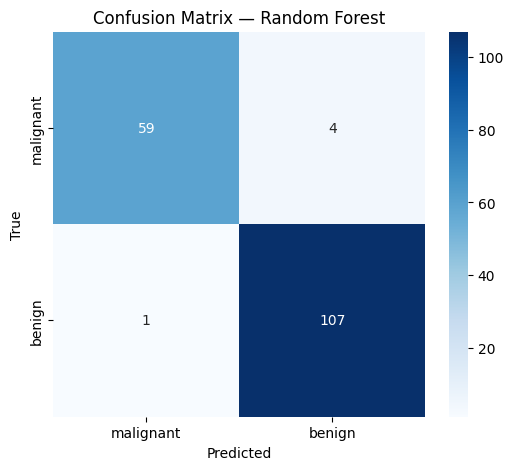

Stacking Classifier accuracy: 0.9824561403508771
Top 5 features:
mean concave points: 0.1419
worst concave points: 0.1271
worst area: 0.1182
mean concavity: 0.0806
worst radius: 0.0780
Precision: 0.963302752293578
Recall: 0.9722222222222222
F1-score: 0.967741935483871
RF max_depth=None -> Accuracy = 0.9708
RF max_depth=2 -> Accuracy = 0.9532
RF max_depth=5 -> Accuracy = 0.9649
RF max_depth=10 -> Accuracy = 0.9708
RF max_depth=20 -> Accuracy = 0.9708
RF max_depth=50 -> Accuracy = 0.9708
Bagging Regressor with base DecisionTreeRegressor: MSE = 7922.5570
Bagging Regressor with base KNeighborsRegressor: MSE = 15438.2934
ROC-AUC (Random Forest): 0.9968400940623163


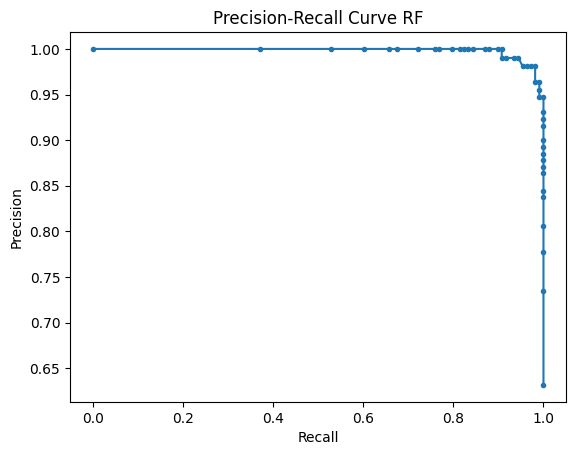

BaggingReg (bootstrap=True, max_samples=0.5): MSE = 8283.5773
BaggingReg (bootstrap=True, max_samples=0.75): MSE = 7655.5639
BaggingReg (bootstrap=True, max_samples=1.0): MSE = 7922.5570
BaggingReg (bootstrap=False, max_samples=0.5): MSE = 7793.0782
BaggingReg (bootstrap=False, max_samples=0.75): MSE = 7708.4326
BaggingReg (bootstrap=False, max_samples=1.0): MSE = 22148.2597


In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, make_classification, make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, StackingClassifier

# 31. Hyperparameter tuning for Random Forest Classifier via GridSearchCV
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best params (RF):", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test Accuracy of best RF:", accuracy_score(y_test, y_pred))


# 32. Train a Bagging Regressor with different numbers of base estimators and compare performance
Xr, yr = make_regression(n_samples=1000, n_features=20, noise=1.0, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.3, random_state=42)

for n in [10, 50, 100, 200]:
    bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    bag_reg.fit(Xr_train, yr_train)
    yr_pred = bag_reg.predict(Xr_test)
    mse = np.mean((yr_test - yr_pred) ** 2)
    print(f"Bagging Regressor with {n} trees: MSE = {mse:.4f}")


# 33. Train a Random Forest Classifier and analyze misclassified samples
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X_train, y_train)
y_pred2 = rf2.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:\n", cm)
# find misclassified
mis_idx = np.where(y_pred2 != y_test)[0]
print("Number of misclassified samples:", len(mis_idx))
print("Sample misclassifications (true vs pred):")
for i in mis_idx[:10]:
    print(f"Index {i}: true = {y_test[i]}, pred = {y_pred2[i]}")


# 34. Compare Bagging Classifier vs single Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_dt)
print("Decision Tree accuracy:", acc_dt)

bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag_clf.fit(X_train, y_train)
y_bag = bag_clf.predict(X_test)
acc_bag = accuracy_score(y_test, y_bag)
print("Bagging (DT) accuracy:", acc_bag)


# 35. Random Forest Classifier + visualize confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

rf3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf3.fit(X_train, y_train)
y3 = rf3.predict(X_test)
cm3 = confusion_matrix(y_test, y3)
plt.figure(figsize=(6,5))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix — Random Forest')
plt.show()


# 36. Train a Stacking Classifier using Decision Trees, SVM, Logistic Regression
estimators = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('svm', SVC(kernel='rbf', probability=True, random_state=42)),
    ('lr', LogisticRegression(solver='liblinear', random_state=42))
]
stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    passthrough=False,
    n_jobs=-1
)
stack_clf.fit(X_train, y_train)
y_stack = stack_clf.predict(X_test)
acc_stack = accuracy_score(y_test, y_stack)
print("Stacking Classifier accuracy:", acc_stack)


# 37. Print top 5 most important features from Random Forest
rf_imp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_imp.fit(X_train, y_train)
importances = rf_imp.feature_importances_
indices = np.argsort(importances)[::-1]
print("Top 5 features:")
for idx in indices[:5]:
    print(f"{data.feature_names[idx]}: {importances[idx]:.4f}")


# 38. Bagging Classifier evaluation using Precision, Recall, F1-score
y_bag2 = bag_clf.predict(X_test)
print("Precision:", precision_score(y_test, y_bag2))
print("Recall:", recall_score(y_test, y_bag2))
print("F1-score:", f1_score(y_test, y_bag2))


# 39. Effect of max_depth on RF accuracy
for depth in [None, 2, 5, 10, 20, 50]:
    rf_test = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf_test.fit(X_train, y_train)
    ydt = rf_test.predict(X_test)
    acc = accuracy_score(y_test, ydt)
    print(f"RF max_depth={depth} -> Accuracy = {acc:.4f}")


# 40. Bagging Regressor with different base estimators (DecisionTree, KNeighbors) compare
for base in [DecisionTreeRegressor(), KNeighborsRegressor(n_neighbors=5)]:
    bag_reg2 = BaggingRegressor(estimator=base, n_estimators=50, random_state=42)
    bag_reg2.fit(Xr_train, yr_train)
    yp2 = bag_reg2.predict(Xr_test)
    mse2 = mean_squared_error(yr_test, yp2)
    print(f"Bagging Regressor with base {base.__class__.__name__}: MSE = {mse2:.4f}")


# 41. Random Forest + ROC-AUC evaluation
rf.fit(X_train, y_train) # Fit the rf instance
y_prob_rf = rf.predict_proba(X_test)[:,1]
auc_rf = roc_auc_score(y_test, y_prob_rf)
print("ROC-AUC (Random Forest):", auc_rf)


# 43. Plot Precision‑Recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_rf)
plt.figure()
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision‑Recall Curve RF')
plt.show()


# 44. Bagging Regressor: effect of bootstrap samples (sample size, fraction, etc.)
for bootstrap in [True, False]:
    # also vary max_samples fraction, say 0.5, 0.75, 1.0
    for max_samples in [0.5, 0.75, 1.0]:
        bag_reg3 = BaggingRegressor(
            estimator=DecisionTreeRegressor(),
            n_estimators=50,
            bootstrap=bootstrap,
            max_samples=max_samples,
            random_state=42
        )
        bag_reg3.fit(Xr_train, yr_train)
        yp3 = bag_reg3.predict(Xr_test)
        mse3 = mean_squared_error(yr_test, yp3)
        print(f"BaggingReg (bootstrap={bootstrap}, max_samples={max_samples}): MSE = {mse3:.4f}")

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# 1. Load data
data = load_breast_cancer()
X, y = data.data, data.target

# 42. Define the base estimator (Decision Tree) and BaggingClassifier
base_tree = DecisionTreeClassifier(random_state=42)
bag_clf = BaggingClassifier(
    estimator=base_tree,
    n_estimators=50,         # number of trees in the bagging ensemble
    max_samples=1.0,         # proportion of samples to draw from X to train each base estimator
    bootstrap=True,          # whether sampling of the samples is with replacement
    random_state=42
)

# 3. Set up cross‑validation strategy
# use stratified k‑fold so that each fold has roughly the same class proportions
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Evaluate using cross_val_score
scores = cross_val_score(bag_clf, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

print("Cross‑validation accuracy scores:", scores)
print("Mean accuracy: {:.4f}".format(scores.mean()))
print("Standard deviation: {:.4f}".format(scores.std()))

Cross‑validation accuracy scores: [0.96491228 0.92982456 0.96491228 0.96491228 0.96460177]
Mean accuracy: 0.9578
Standard deviation: 0.0140
